#Lecture: CS412 Machine Learning | Homework 2
####Instructor: Alper Özpınar
####Author: Mert Atabey Dincer
####Student ID: 20637
####Email: atabeymert@sabanciuniv.edu
####Date: 28.07.2020



In [30]:
import numpy as np
import pandas as pd

In [31]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

columnNames = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Output"]
df= pd.read_csv(url, header=None) #Reads dataset from url
df.columns = columnNames
rows = len(df)
columns = len(df.columns)

In [32]:
from sklearn.model_selection import train_test_split 

data = df.drop(columns=['Output'])
labels= df['Output'].values


#Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)


For k=1, accuracy is 0.93 and f1 score is 0.93.



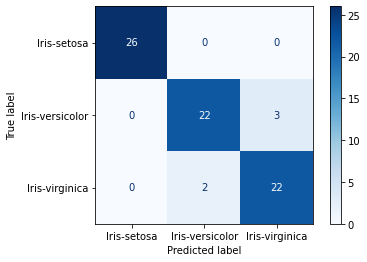

For k=2, accuracy is 0.93 and f1 score is 0.93.



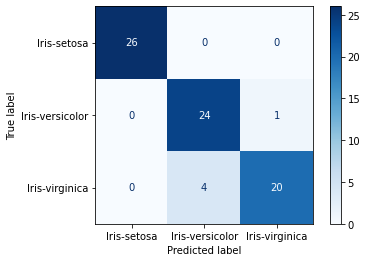

For k=3, accuracy is 0.95 and f1 score is 0.95.



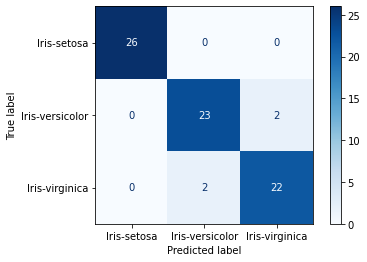

For k=4, accuracy is 0.96 and f1 score is 0.96.



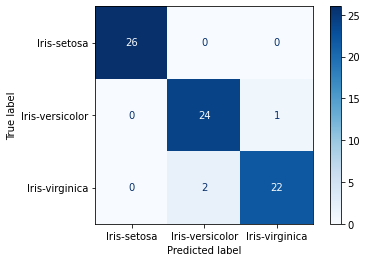

For k=5, accuracy is 0.95 and f1 score is 0.95.



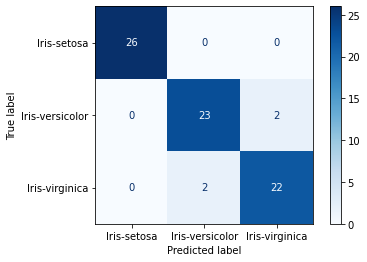

For k=6, accuracy is 0.95 and f1 score is 0.95.



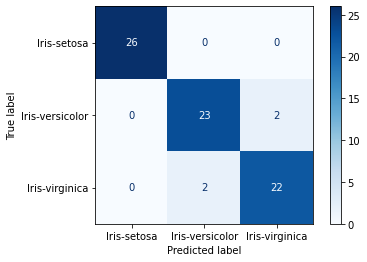

For k=7, accuracy is 0.95 and f1 score is 0.95.



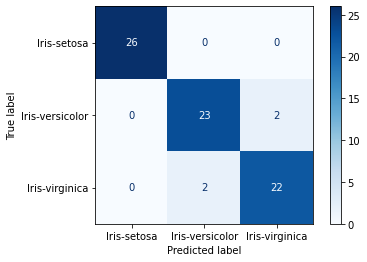

For k=8, accuracy is 0.96 and f1 score is 0.96.



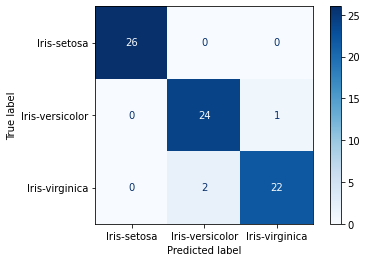

For k=9, accuracy is 0.96 and f1 score is 0.96.



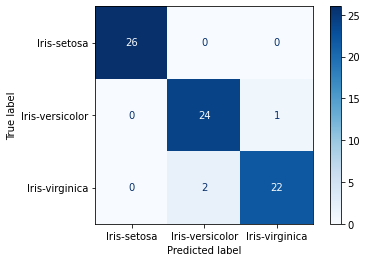

The best k value is:4


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

#Apply k between k=1 to 10 
kVals = range(1,10,1)
accuracies = 0
f1s = 0
current_k = 0

for k in kVals:
  model = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  acc = accuracy_score(y_test, predictions)
  f1 = f1_score(y_test, predictions,average='weighted')

  print("For k={}, accuracy is {:.2f} and f1 score is {:.2f}.".format(k,acc,f1))
  print("")

  if acc>accuracies and f1>f1s: #Updates best k if there is better accuracy and f1 score
    accuracies=acc
    f1s=f1
    best_k=k

  plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
  plt.show()

print("The best k value is:{}".format(best_k))

#First Run:

For k=1, accuracy is 1.00 and f1 score is 1.00.

For k=2, accuracy is 0.97 and f1 score is 0.97.

For k=3, accuracy is 1.00 and f1 score is 1.00.

For k=4, accuracy is 1.00 and f1 score is 1.00.

For k=5, accuracy is 1.00 and f1 score is 1.00.

For k=6, accuracy is 1.00 and f1 score is 1.00.

For k=7, accuracy is 0.97 and f1 score is 0.97.

For k=8, accuracy is 1.00 and f1 score is 1.00.

For k=9, accuracy is 1.00 and f1 score is 1.00.

The best k value is:1

#Second Run:

For k=1, accuracy is 0.97 and f1 score is 0.97.

For k=2, accuracy is 0.95 and f1 score is 0.95.

For k=3, accuracy is 0.97 and f1 score is 0.97.

For k=4, accuracy is 0.97 and f1 score is 0.97.

For k=5, accuracy is 0.97 and f1 score is 0.97.

For k=6, accuracy is 0.95 and f1 score is 0.95.

For k=7, accuracy is 0.95 and f1 score is 0.95.

For k=8, accuracy is 0.92 and f1 score is 0.92.

For k=9, accuracy is 0.97 and f1 score is 0.97.

The best k value is:1

#Thrid Run

For k=1, accuracy is 1.00 and f1 score is 1.00.

For k=2, accuracy is 0.89 and f1 score is 0.89.

For k=3, accuracy is 0.97 and f1 score is 0.97.

For k=4, accuracy is 0.95 and f1 score is 0.95.

For k=5, accuracy is 0.97 and f1 score is 0.97.

For k=6, accuracy is 0.95 and f1 score is 0.95.

For k=7, accuracy is 0.97 and f1 score is 0.97.

For k=8, accuracy is 0.95 and f1 score is 0.95.

For k=9, accuracy is 0.95 and f1 score is 0.95.

The best k value is:1


###The reason why I am getting different results on each run, even I use all same parameters and data set, is splitting the dataset into training and test differently each time. In other words, when I call the function:  
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)
###since I did not specify a random statement such as (random_state=5), every time I run the code, train_test_split function picks different random samples from the dataset. If I would add (random_state=1), again it was going to pick samples randomly but each time I run the code, this randomness would stay the same.

#Best K value is 1:
###In this case, my best k value is 1. Because I get the highest accuracy and F1 score with k=1. In terms of accuracy, it gives us information about Confusion Matrix which shows us the number of True / False - Positive / Negative samples. In this case, k=1,  the number of TRUE PREDICTIONS (True Positive, True Negative) is higest. In other words, this confusion matrix says that k=1 gives us better predictions. There are also others with the same values as k=1 but since, all the same, I choose the first of them. 

For k=1, accuracy is 0.93 and f1 score is 0.93.


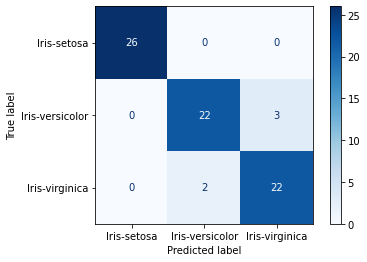

In [34]:
from sklearn.preprocessing import MinMaxScaler #Distance weighting for only data. Does not include labels.

scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)


#Split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5) #Train for %50 portion

model = KNeighborsClassifier(n_neighbors=1, weights='uniform')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions,average='weighted')

print("For k=1, accuracy is {:.2f} and f1 score is {:.2f}.".format(acc,f1))

plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

  

#On the same run
##For k=1, in case of %75-%25 split:

For k=1, accuracy is 1.00 and f1 score is 1.00.

##For k=1, in case of %50-%50 split:

For k=1, accuracy is 0.96 and f1 score is 0.96.

###So We can say that for this situation (application) 75-25 splitting is better than 50-50. In other words, training with %50 portion of the data set for training is not enough to get better predictions in this case. That's why the %75 training gave us better results.

